In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace the path below with the actual path to your CSV file if it's not in the same directory as your Jupyter Notebook
file_path = 'commodities_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

In [3]:
# Convert the datetime column to a datetime object
#df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')

# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
# Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.8+ GB


In [5]:
df.head()

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00


In [6]:
# Group by 'item.class' and count unique 'item.id'
class_counts = df.groupby('item.class')['item.id'].nunique()

print("Number of unique items for each item class:")
print(class_counts)

Number of unique items for each item class:
item.class
Armor              11
Consumables      3201
Gems             1003
Glyphs            111
Miscellaneous    1979
Recipes             3
Trade Goods      2093
Unknown           701
Name: item.id, dtype: int64


In [7]:
# Replace 'Unknown' with NaN for item.name and item.class
df['item.name'] = df['item.name'].replace('Unknown', pd.NA)
df['item.class'] = df['item.class'].replace('Unknown', pd.NA)

# Count the total number of items
total_items = len(df)

# Count items where 'name' or 'class' is missing or 'Unknown'
missing_name = len(df[df['item.name'].isna()])
missing_class = len(df[df['item.class'].isna()])
missing_both = len(df[df['item.name'].isna() & df['item.class'].isna()])

# Print the results
print(f"Total rows: {total_items:,}")
print(f"Rows missing name: {missing_name:,}")
print(f"Rows missing class: {missing_class:,}")
print(f"Rows missing both name and class: {missing_both:,}")


Total rows: 79,852,830
Rows missing name: 6,902
Rows missing class: 7,323,232
Rows missing both name and class: 6,902


In [8]:

# Group by 'item.id', 'item.name', and 'datetime', then calculate min, max, median, and mean unit_price
price_stats = df.groupby(['item.id', 'item.name', 'datetime'])['unit_price'].agg(['min', 'max', 'median', 'mean']).reset_index()

# Sort the DataFrame by 'datetime' in ascending order
price_stats_sorted = price_stats.sort_values(by='datetime', ascending=True)

# Display the first 10 rows of the sorted DataFrame
price_stats_sorted.head(10)

,item.id,item.name,datetime,min,max,median,mean
0,117,Tough Jerky,2023-12-22 18:41:00,100,2554690000,100.0,2.045379e+07
1645568,163077,Glacier Bay Halibut,2023-12-22 18:41:00,10400,10800,10800.0,1.067857e+04
1110774,76616,Perfect Veiled Roguestone,2023-12-22 18:41:00,650000,27950000,14300000.0,1.430000e+07
607348,38919,Enchant 2H Weapon - Savagery,2023-12-22 18:41:00,809700,809800,809700.0,8.097250e+05
843668,52140,Perfect Artful Hessonite,2023-12-22 18:41:00,19500,19500,19500.0,1.950000e+04
1975262,192746,Curio of Yore,2023-12-22 18:41:00,25000,480009800,32300.0,3.103014e+07
1110489,76615,Perfect Accurate Roguestone,2023-12-22 18:41:00,49500,47750000,49750.0,1.197475e+07
1110225,76614,Perfect Glinting Roguestone,2023-12-22 18:41:00,16600,16600,16600.0,1.660000e+04
1111059,76617,Perfect Retaliating Roguestone,2023-12-22 18:41:00,114300,47750000,115400.0,8.083433e+06
311553,20869,Amber Idol,2023-12-22 18:41:00,7000,14800,14800.0,1.168000e+04


In [9]:
print(f"Number of rows: {len(df):,}")
# Drop rows where either 'item.name' or 'item.class' is NA
cleaned_df = df.dropna(subset=['item.name', 'item.class'])
print(f"Number of rows after removing NAs: {len(cleaned_df):,}")

Number of rows: 79,852,830
Number of rows after removing NAs: 72,529,598


/var/folders/y2/14_x44lj4j5dz2lmwv2s62pc0000gn/T/ipykernel_38745/1616256757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['unit_price_scaled'] = cleaned_df['unit_price'] / 10000


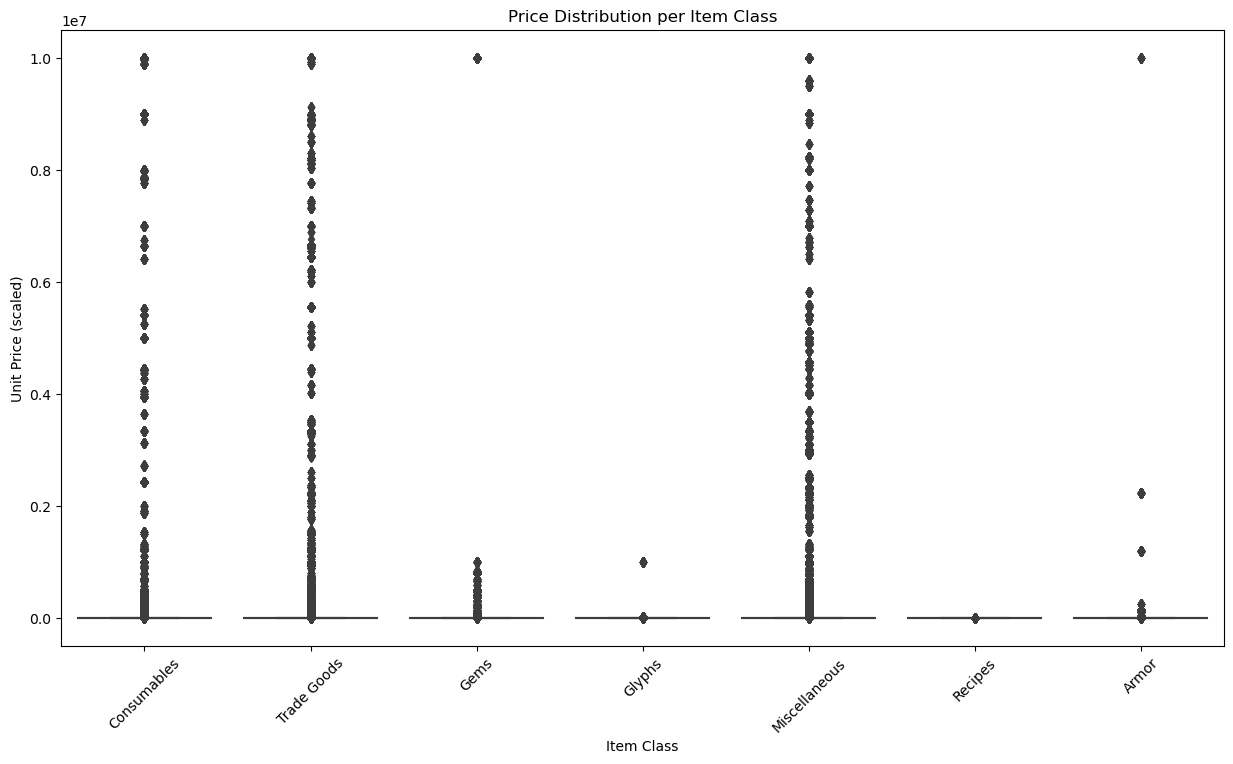

In [10]:
# Convert 'unit_price' to a more manageable scale if needed (e.g., dividing by 10000)
cleaned_df['unit_price_scaled'] = cleaned_df['unit_price'] / 10000

# Filter out rows with missing or irrelevant item classes if necessary
# df = df[df['item.class'].isin(['Armor', 'Consumables', 'Gems', ...])]

# Create a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='item.class', y='unit_price_scaled', data=cleaned_df)

plt.title('Price Distribution per Item Class')
plt.xlabel('Item Class')
plt.ylabel('Unit Price (scaled)')
plt.xticks(rotation=45)  # Rotates the item class names for better readability
plt.show()

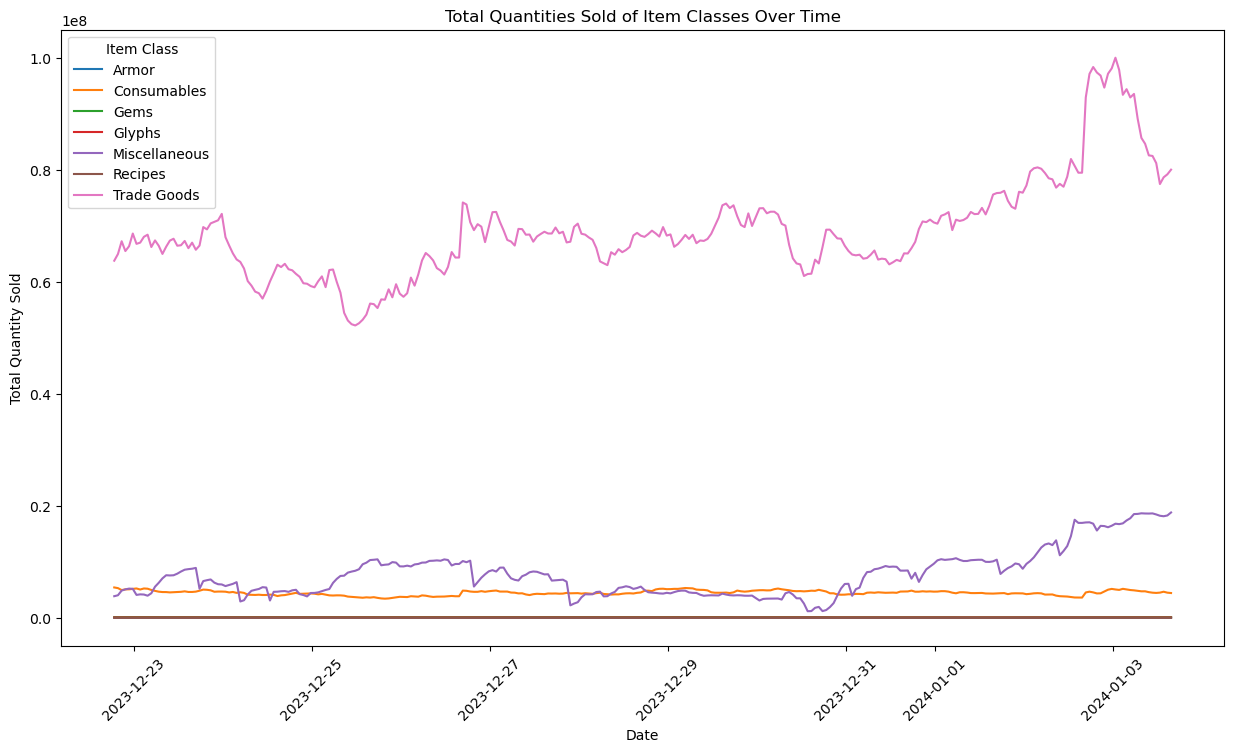

In [11]:
# Group by date and item class, then sum the quantities
total_quantities = cleaned_df.groupby(['datetime', 'item.class'])['quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='datetime', y='quantity', hue='item.class', data=total_quantities)
plt.title('Total Quantities Sold of Item Classes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Item Class')
plt.show()

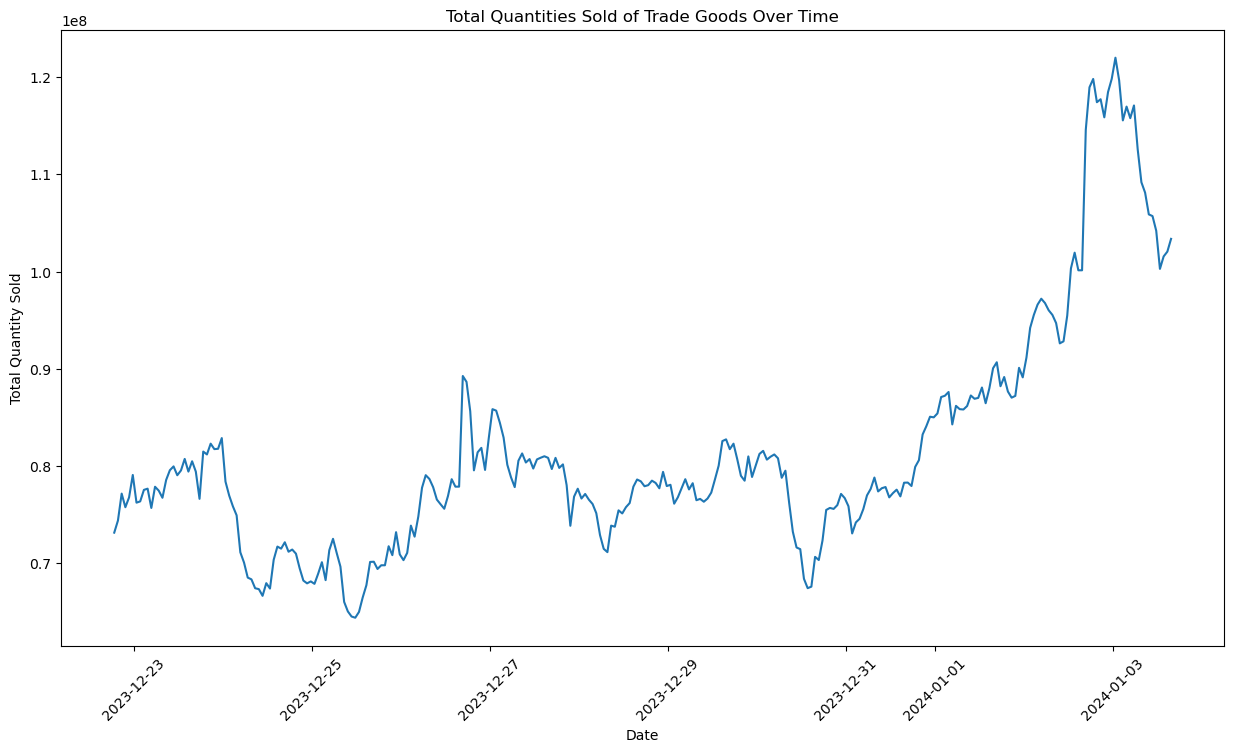

In [12]:
# Group by date, then sum the quantities for Trade Goods
total_quantities_trade_goods = cleaned_df.groupby('datetime')['quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='datetime', y='quantity', data=total_quantities_trade_goods)
plt.title('Total Quantities Sold of Trade Goods Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Create a count column for each item.id
item_id_counts = cleaned_df['item.id'].value_counts().to_dict()
cleaned_df['item_id_count'] = cleaned_df['item.id'].map(item_id_counts)

# Filter the DataFrame for 'Trade Goods'
trade_goods_df = cleaned_df[cleaned_df['item.class'] == 'Trade Goods']


/var/folders/y2/14_x44lj4j5dz2lmwv2s62pc0000gn/T/ipykernel_38745/1968690730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['item_id_count'] = cleaned_df['item.id'].map(item_id_counts)


In [14]:
trade_goods_df.head(25)

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime,unit_price_scaled,item_id_count
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00,0.20,24525
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00,0.24,80088
5,1899749749,8,2980000,SHORT,4389,Gyrochronatom,Trade Goods,2023-12-28 15:41:00,298.00,5081
12,1899750409,1,100000000,SHORT,204464,Shadowflame Essence,Trade Goods,2023-12-28 15:41:00,10000.00,108795
15,1899750794,765,140000,SHORT,89112,Mote of Harmony,Trade Goods,2023-12-28 15:41:00,14.00,69702
16,1899750839,13,18600,SHORT,22202,Small Obsidian Shard,Trade Goods,2023-12-28 15:41:00,1.86,12850
19,1899751352,2,17900,SHORT,193960,Chromatic Embroidery Thread,Trade Goods,2023-12-28 15:41:00,1.79,15377
20,1899751798,3,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00,0.24,80088
21,1899751865,50,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00,0.24,80088
22,1899752361,53,700,SHORT,172054,Raw Seraphic Wing,Trade Goods,2023-12-28 15:41:00,0.07,302000


In [15]:
# Define thresholds for low price and high quantity
low_price_threshold = cleaned_df['unit_price'].quantile(0.1)  # e.g., bottom 10% of prices
high_quantity_threshold = cleaned_df['quantity'].quantile(0.9)  # e.g., top 10% of quantities

# Filter the DataFrame
junk_candidates = cleaned_df[(cleaned_df['unit_price'] <= low_price_threshold) & 
                             (cleaned_df['quantity'] >= high_quantity_threshold)]

In [16]:
# Aggregate data
junk_summary = junk_candidates.groupby('item.name').agg({'quantity': 'sum', 'unit_price': 'mean'}).reset_index()

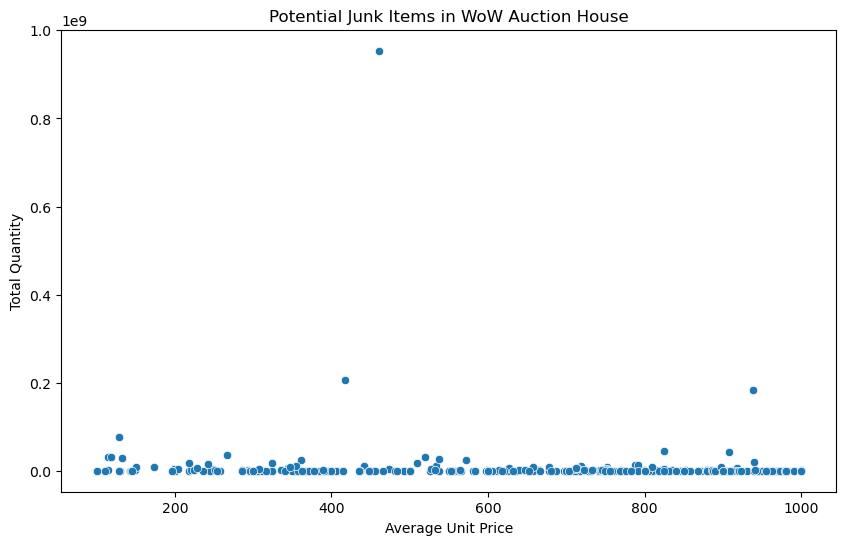

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=junk_summary, x='unit_price', y='quantity')
plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.title('Potential Junk Items in WoW Auction House')
plt.show()

In [18]:
# Aggregating data
agg_data = cleaned_df.groupby('item.name').agg(
    total_quantity=('quantity', 'sum'),
    average_price=('unit_price', 'mean')
).reset_index()


In [19]:
# Define thresholds
high_quantity_threshold = agg_data['total_quantity'].quantile(0.90)
low_price_threshold = agg_data['average_price'].quantile(0.10)


In [20]:
# Filtering potential "junk" items
potential_junk = agg_data[(agg_data['total_quantity'] >= high_quantity_threshold) &
                          (agg_data['average_price'] <= low_price_threshold)]


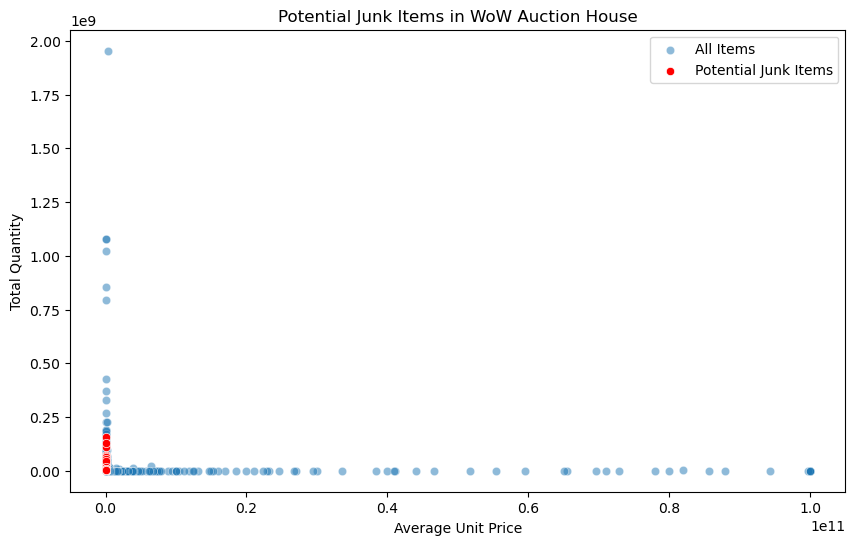

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_data, x='average_price', y='total_quantity', alpha=0.5)
sns.scatterplot(data=potential_junk, x='average_price', y='total_quantity', color='red')

plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity')
plt.title('Potential Junk Items in WoW Auction House')
plt.legend(['All Items', 'Potential Junk Items'])
plt.show()


In [22]:
# get separate dataframes for each item.class
class_dfs = {}

# Loop through each unique item class and create a separate dataframe
for item_class in cleaned_df['item.class'].unique():
    class_dfs[item_class] = cleaned_df[cleaned_df['item.class'] == item_class]
    print(f"DataFrame for item class '{item_class}' created.")

DataFrame for item class 'Consumables' created.
DataFrame for item class 'Trade Goods' created.
DataFrame for item class 'Gems' created.
DataFrame for item class 'Glyphs' created.
DataFrame for item class 'Miscellaneous' created.
DataFrame for item class 'Recipes' created.
DataFrame for item class 'Armor' created.


In [27]:
# Group by 'item.class' and count unique 'item.id'
unique_items_per_class = cleaned_df.groupby('item.class')['item.id'].nunique()

# Print the results
print(unique_items_per_class)

item.class
Armor              11
Consumables      3201
Gems             1003
Glyphs            111
Miscellaneous    1979
Recipes             3
Trade Goods      2093
Name: item.id, dtype: int64


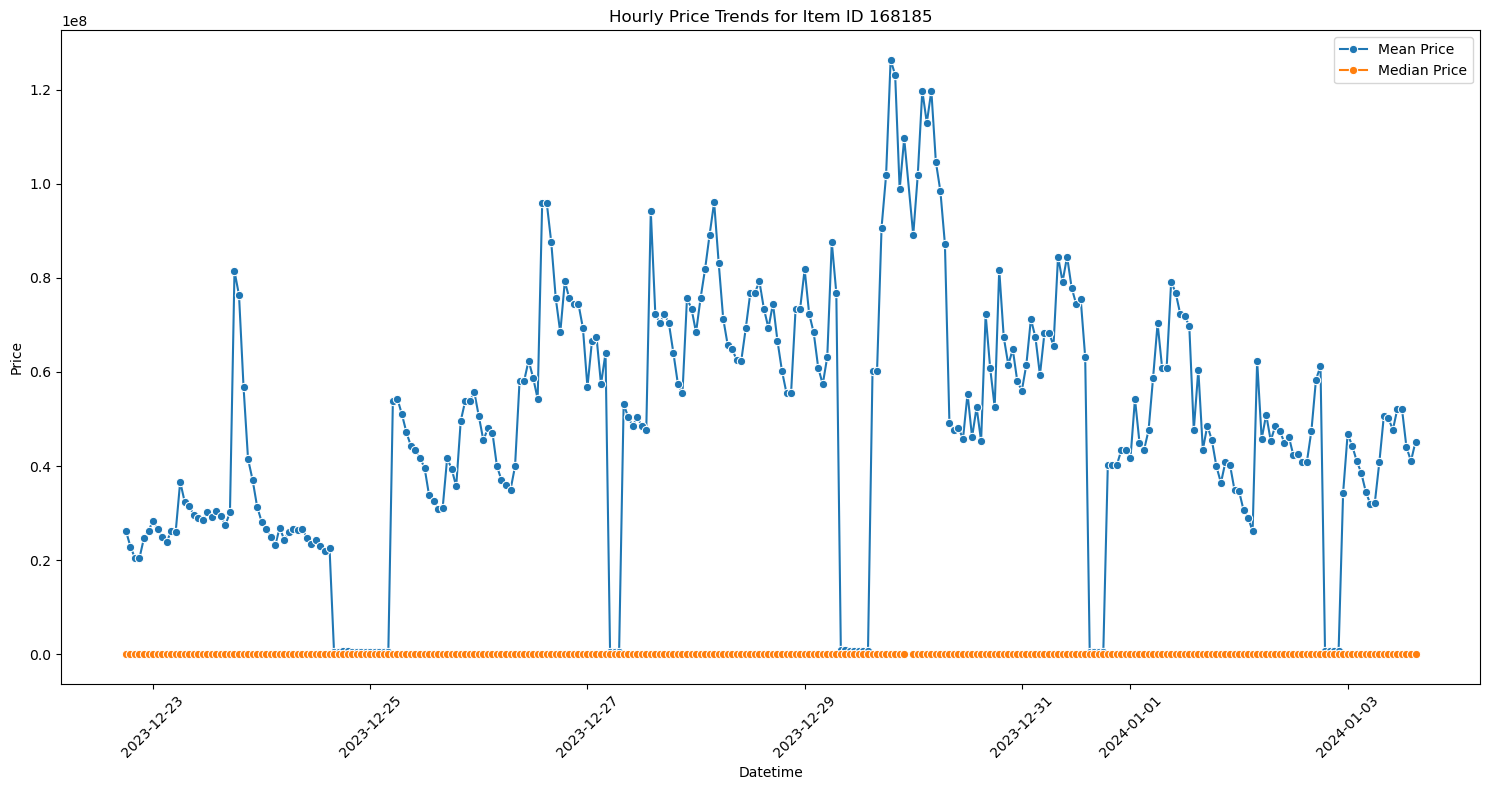

In [30]:
grouped_df = cleaned_df.groupby(['item.id', cleaned_df['datetime'].dt.floor('H')]).agg(
    min_price=('unit_price', 'min'),
    max_price=('unit_price', 'max'),
    median_price=('unit_price', 'median'),
    mean_price=('unit_price', 'mean')
).reset_index()


# Replace 'specific_item_id' with an actual item ID
specific_item_id = 168185
specific_item_df = grouped_df[grouped_df['item.id'] == specific_item_id]

plt.figure(figsize=(15, 8))
sns.lineplot(x='datetime', y='mean_price', data=specific_item_df, label='Mean Price', marker='o')
sns.lineplot(x='datetime', y='median_price', data=specific_item_df, label='Median Price', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title(f'Hourly Price Trends for Item ID {specific_item_id}')
plt.legend()
plt.tight_layout()
plt.show()


Percentage of 'junk' items: 0.84%


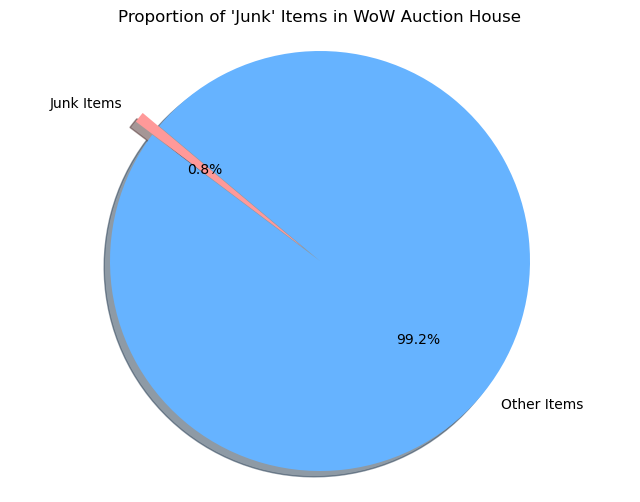

: 

In [34]:
high_quantity_threshold = cleaned_df['quantity'].quantile(0.90)  # top 10% of quantities
low_price_threshold = cleaned_df['unit_price'].quantile(0.10)  # bottom 10% of prices

junk_items_df = cleaned_df[(cleaned_df['quantity'] >= high_quantity_threshold) &
                           (cleaned_df['unit_price'] <= low_price_threshold)]

total_items = len(cleaned_df)
junk_items_count = len(junk_items_df)
junk_percentage = (junk_items_count / total_items) * 100
print(f"Percentage of 'junk' items: {junk_percentage:.2f}%")

labels = ['Junk Items', 'Other Items']
sizes = [junk_items_count, total_items - junk_items_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title("Proportion of 'Junk' Items in WoW Auction House")
plt.show()